<a href="https://colab.research.google.com/github/harshpsi9194/EE656/blob/main/Harsh_230447_Assingment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-3

### Ans_1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def update_cluster_centers(data_points, current_centers, cluster_assignments, num_clusters):
    updated_centers = np.zeros((num_clusters, data_points.shape[1]))

    for cluster_id in range(len(current_centers)):
        cluster_mask = (cluster_assignments == cluster_id)
        assigned_points = data_points[cluster_mask]

        if len(assigned_points) > 0:
            updated_centers[cluster_id] = np.mean(assigned_points, axis=0)
        else:
            updated_centers[cluster_id] = current_centers[cluster_id]

    return updated_centers

In [ ]:
def clustering_algorithm(dataset, num_clusters, max_iterations=100, convergence_threshold=1e-4, seed=None):
    if seed is not None:
        np.random.seed(seed)

    random_indices = np.random.choice(len(dataset), size=num_clusters, replace=False)
    cluster_centers = dataset[random_indices].copy()

    for iteration_count in range(max_iterations):
        distances = np.sqrt(np.sum((dataset[:, np.newaxis, :] - cluster_centers[np.newaxis, :, :]) ** 2, axis=2))
        point_assignments = np.argmin(distances, axis=1)

        new_centers = update_cluster_centers(dataset, cluster_centers, point_assignments, num_clusters)

        center_movement = np.max(np.sqrt(np.sum((cluster_centers - new_centers) ** 2, axis=1)))

        if center_movement < convergence_threshold:
            break

        cluster_centers = new_centers

    print(cluster_centers)
    return cluster_centers, point_assignments, iteration_count + 1

[[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]


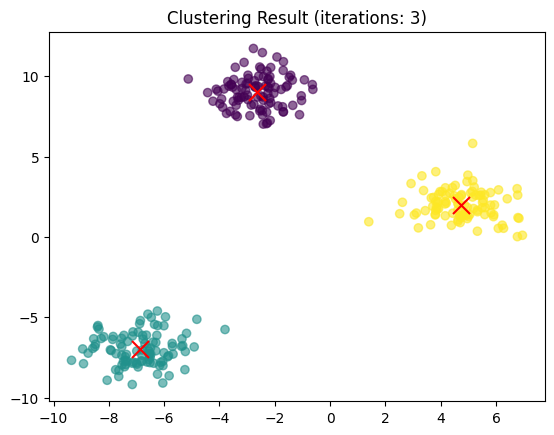

In [ ]:
data_matrix, _ = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

final_centers, point_labels, total_iterations = clustering_algorithm(data_matrix, num_clusters=3, seed=42)

plt.scatter(data_matrix[:, 0], data_matrix[:, 1], c=point_labels, cmap='viridis', alpha=0.6)
plt.scatter(final_centers[:, 0], final_centers[:, 1], color='red', marker='x', s=150)
plt.title(f"Clustering Result (iterations: {total_iterations})")
plt.show()

### Ans_2

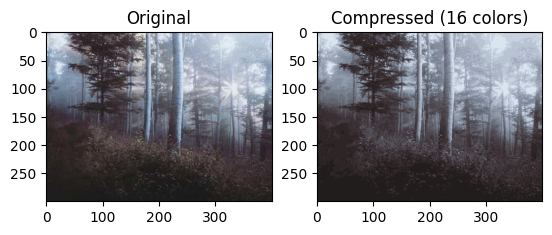

Size reduced by 61.34%


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import requests
from io import BytesIO

response = requests.get("https://picsum.photos/400/300")
source_image = Image.open(BytesIO(response.content))
rgb_image = source_image.convert("RGB")

image_data = np.array(rgb_image)
width, height = rgb_image.size
color_values = image_data.reshape(-1, 3)

clustering_model = KMeans(n_clusters=16, init='k-means++', random_state=42)
clustering_model.fit(color_values)
reduced_colors = clustering_model.cluster_centers_[clustering_model.labels_]

final_image_data = reduced_colors.reshape(image_data.shape).astype(np.uint8)
result_image = Image.fromarray(final_image_data)

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(rgb_image)

plt.subplot(1, 2, 2)
plt.title("Compressed (16 colors)")
plt.imshow(result_image)
plt.show()

rgb_image.save("original.png")
result_image.save("compressed.png")

initial_file_size = os.path.getsize("original.png")
final_file_size = os.path.getsize("compressed.png")

size_reduction = 100 * (initial_file_size - final_file_size) / initial_file_size
print(f"Size reduced by {size_reduction:.2f}%")

### Ans_3

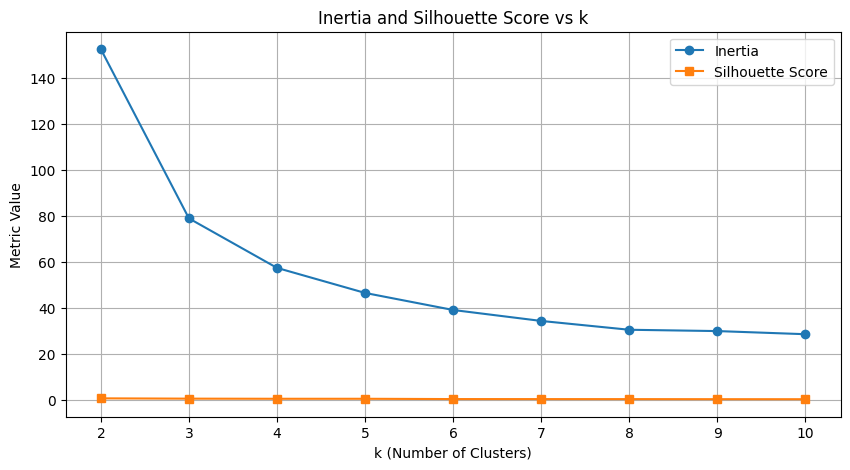

Suggested k_elbow (elbow method): 8
Suggested k_silhouette (max silhouette score): 2


In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

dataset = load_iris()
feature_matrix = dataset.data

within_cluster_variance = []
avg_silhouette_values = []
cluster_range = range(2, 11)

for num_clusters in cluster_range:
    clustering_model = KMeans(n_clusters=num_clusters, random_state=42)
    clustering_model.fit(feature_matrix)

    within_cluster_variance.append(clustering_model.inertia_)
    avg_silhouette_values.append(silhouette_score(feature_matrix, clustering_model.labels_))

plt.figure(figsize=(10, 5))
plt.plot(cluster_range, within_cluster_variance, marker='o', label='Inertia')
plt.plot(cluster_range, avg_silhouette_values, marker='s', label='Silhouette Score')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Metric Value')
plt.title('Inertia and Silhouette Score vs k')
plt.legend()
plt.grid(True)
plt.show()

variance_reductions = np.diff(within_cluster_variance)
reduction_percentages = -np.diff(within_cluster_variance) / within_cluster_variance[:-1]
optimal_k_elbow = None
for idx in range(1, len(reduction_percentages)):
    if reduction_percentages[idx] < 0.10:
        optimal_k_elbow = cluster_range[idx]
        break

optimal_k_silhouette = cluster_range[np.argmax(avg_silhouette_values)]

print(f"Suggested k_elbow (elbow method): {optimal_k_elbow}")
print(f"Suggested k_silhouette (max silhouette score): {optimal_k_silhouette}")
if optimal_k_elbow == optimal_k_silhouette:
    pri

# Ans_4

In [ ]:
import time
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score

def benchmark_kmeans(n_samples=1_000_000, n_clusters=10, n_features=10, batch_size=10_000, random_state=42):
    X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters,
                           n_features=n_features, random_state=random_state)

    results = {}

    start = time.perf_counter()
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X)
    end = time.perf_counter()

    results['KMeans'] = {
        'time': end - start,
        'inertia': kmeans.inertia_,
        'ARI': adjusted_rand_score(y_true, kmeans.labels_)
    }

    start = time.perf_counter()
    minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, random_state=random_state)
    minibatch_kmeans.fit(X)
    end = time.perf_counter()

    results['MiniBatchKMeans'] = {
        'time': end - start,
        'inertia': minibatch_kmeans.inertia_,
        'ARI': adjusted_rand_score(y_true, minibatch_kmeans.labels_)
    }


In [ ]:
results = benchmark_kmeans()


### Problem-5

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
categories = ['sci.space', 'sci.med', 'sci.electronics', 'sci.crypt']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(newsgroups.data)

X = normalize(X.toarray(), norm='l2')

In [ ]:
def cosine_kmeans(X, k=4, max_iter=100, tol=1e-4, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[indices]
    centroids = normalize(centroids, axis=1)

    empty_reinits = 0

    for iteration in range(max_iter):
        similarities = X @ centroids.T
        labels = np.argmax(similarities, axis=1)

        new_centroids = np.zeros((k, n_features))
        counts = np.zeros(k)

        for i in range(n_samples):
            new_centroids[labels[i]] += X[i]
            counts[labels[i]] += 1

        for i in range(k):
            if counts[i] == 0:
                min_sim = np.max(X @ centroids.T, axis=1)
                farthest_idx = np.argmin(min_sim)
                new_centroids[i] = X[farthest_idx]
                empty_reinits += 1
            else:
                new_centroids[i] /= counts[i]

        new_centroids = normalize(new_centroids, axis=1)

        shift = np.max(1 - np.sum(new_centroids * centroids, axis=1))
        centroids = new_centroids

        if shift < tol:
            break

    final_similarities = X @ centroids.T
    best_sim = np.max(final_similarities, axis=1)
    inertia = np.sum(1 - best_sim)

    return centroids, labels, inertia, empty_reinits, iteration + 1

In [ ]:
centroids, labels, inertia, reinits, iters = cosine_kmeans(X, k=4)

print(f"Final Cosine-Distance Inertia: {inertia:.4f}")
print(f"Empty Cluster Re-initialisations: {reinits}")
print(f"Total Iterations: {iters}")

Final Cosine-Distance Inertia: 1679.7590
Empty Cluster Re-initialisations: 0
Total Iterations: 22
